<a href="https://colab.research.google.com/github/Erica2222/CCMACLRL_EXERCISES_COM221ML/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [1844]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [1845]:
df = pd.read_excel('ERICA.xlsx')

1. Display the summary of all the features of the dataset using `.info()`

In [1846]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         49 non-null     object
 1   Post/Share Frequently?       49 non-null     int64 
 2   Active in social media?      49 non-null     int64 
 3   Replies to comments?         49 non-null     int64 
 4   Number of friends/followers  49 non-null     int64 
 5   Personality                  49 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.4+ KB


2. Display the total number of samples from each label using `.value_counts()`

In [1847]:
df.describe()

,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,0.489796,0.612245,0.489796,634.836735,0.714286
std,0.505076,0.492287,0.505076,854.546648,0.456435
min,0.000000,0.000000,0.000000,14.000000,0.000000
25%,0.000000,0.000000,0.000000,201.000000,0.000000
50%,0.000000,1.000000,0.000000,450.000000,1.000000
75%,1.000000,1.000000,1.000000,647.000000,1.000000
max,1.000000,1.000000,1.000000,5428.000000,1.000000


In [1848]:
df.value_counts()

,,,,,,count
Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality,
Betina,1,1,1,19,1,1
janice,0,0,0,178,0,1
joshua,1,1,0,477,1,1
justine,1,1,1,421,1,1
kath,1,1,1,1827,1,1
kyle,1,1,1,1459,1,1
louie,0,0,0,647,1,1
luis,1,1,1,616,1,1
lynn,1,1,1,811,1,1


In [1849]:
df.drop(columns='Name', inplace=True)



## C. Split the dataset into training and test set

In [1850]:
X = df.drop(columns=['Personality']).values


4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [1851]:
y = df['Personality'].values

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [1852]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=20)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(44, 4)
(44,)
(5, 4)
(5,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [1853]:
knn = KNeighborsClassifier(n_neighbors=20)

7. Train the model using the `.fit()`

In [1854]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

8. Test the model using the `.predict()`

In [1855]:
y_pred = knn.predict(X_test)

## Evaluate the model

9. Create a confusion matrix

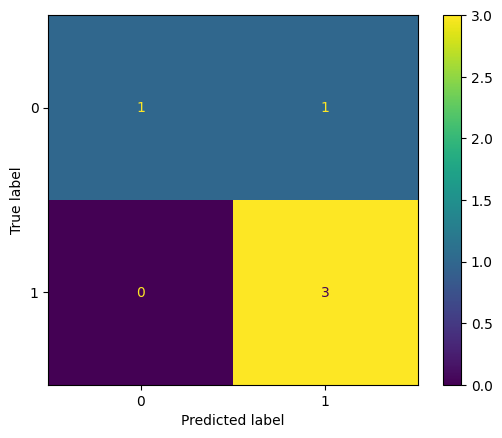

In [1856]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [1857]:
metrics.accuracy_score(y_test, y_pred)

0.8

11. Display the precision

In [1858]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.5 1. ]


12. Display the recall

In [1859]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [1.   0.75]


13. Display the f1-score

In [1860]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.66666667 0.85714286]


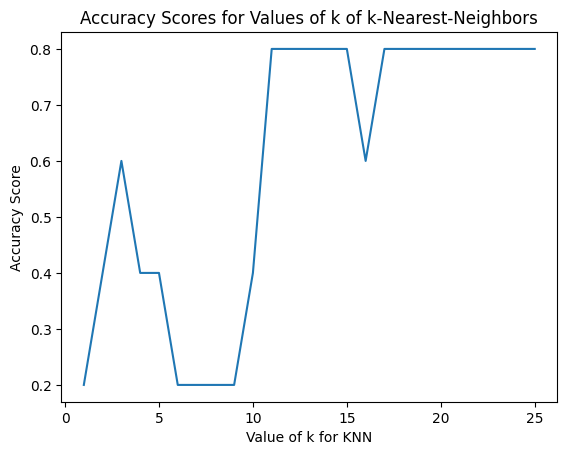

In [1861]:
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [1862]:
knn.predict([[0,1,0,100]])

array([0])